In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Separe os dados em treino (80%) e teste (20%).

In [3]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:
    1. Mostre a importância das features.
    2. Desenhe a árvore de decisão.
    3. Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

In [4]:
best_score_dt = []

for i in range(1, 15):
    model_dt = DecisionTreeClassifier(max_depth=i)
    model_dt.fit(X_train,y_train)
    y_pred = model_dt.predict(X_test)
    best_score_dt.append(f1_score(y_test,y_pred))

print(f"O melhor resultado é para max_depths = {best_score_dt.index(max(best_score_dt))}")
print(f"Melhor valor de f1-score: {best_score_dt[best_score_dt.index(max(best_score_dt))]}")

O melhor resultado é para max_depths = 4
Melhor valor de f1-score: 0.7037037037037037


[Text(428.96250000000003, 489.24, 'Glucose <= 154.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(230.175, 380.52000000000004, 'BMI <= 27.35\ngini = 0.379\nsamples = 515\nvalue = [384, 131]'),
 Text(125.55000000000001, 271.8, 'Glucose <= 151.5\ngini = 0.097\nsamples = 137\nvalue = [130, 7]'),
 Text(83.7, 163.08000000000004, 'BMI <= 9.1\ngini = 0.084\nsamples = 136\nvalue = [130, 6]'),
 Text(41.85, 54.360000000000014, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.061\nsamples = 127\nvalue = [123, 4]'),
 Text(167.4, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 271.8, 'Age <= 30.5\ngini = 0.441\nsamples = 378\nvalue = [254, 124]'),
 Text(251.10000000000002, 163.08000000000004, 'Glucose <= 127.5\ngini = 0.332\nsamples = 205\nvalue = [162, 43]'),
 Text(209.25, 54.360000000000014, 'gini = 0.238\nsamples = 159\nvalue = [137, 22]'),
 Text(292.95, 54.360000000000014, 'gini = 0.496\nsamples = 46\n

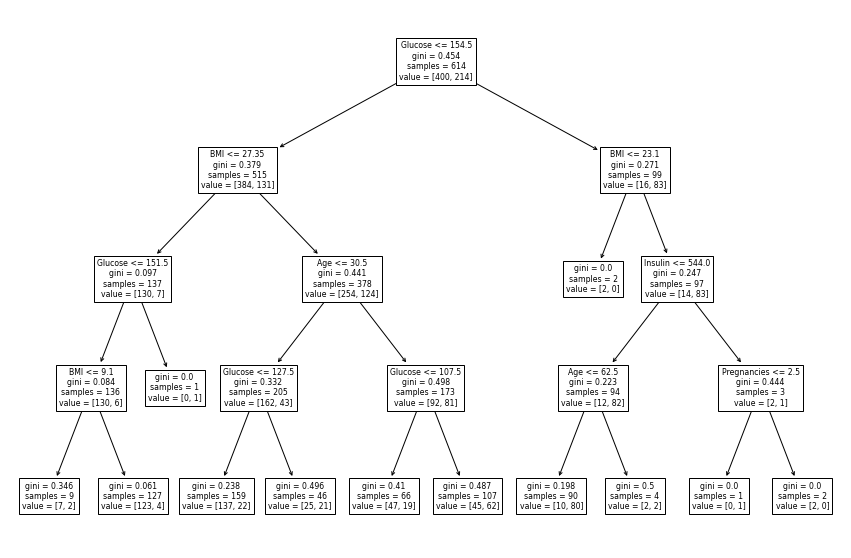

In [5]:
model_dt = DecisionTreeClassifier(max_depth=best_score_dt.index(max(best_score_dt)))
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

pylab.figure(figsize=(15,10))
plot_tree(model_dt, feature_names=X_train.columns)

## 3. Crie um modelo ensemble de Votação
(MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3
algoritmos de aprendizado de máquina. Compare o resultado de usar os
modelos isoladamente com o resultado usando o MajorityVoteClassifier
sobre o conjunto de teste usando a métrica F1-Score. Pode se basear no
seguinte [documento](https://github.com/InsightLab/imersao-ciencia-de-dados/blob/master/2019/08-Modelos_de_Ensemble/Ensemble.ipynb), mas não precisa usar k-Fold Cross Validation.

### KNN

In [6]:
ks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

grid_param = {"n_neighbors": ks}

model_knn = KNeighborsClassifier()
clf_knn = GridSearchCV(model_knn, grid_param, cv=5)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

print(clf_knn.best_estimator_)

f1_score(y_test, y_pred)

KNeighborsClassifier(n_neighbors=12)


0.5106382978723405

### SVM

In [7]:
grid_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

model_svc = SVC()
clf_svc = GridSearchCV(model_svc, grid_param, cv=5)
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
print(clf_svc.best_estimator_)


f1_score(y_test, y_pred)

SVC(C=1, gamma=0.0001)


0.5434782608695652

### Naive Bayes

In [8]:
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
grid_param = {'var_smoothing':steps}
model_nb = GaussianNB()
clf_nb = GridSearchCV(model_nb, grid_param, cv=5)
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)


print(clf_nb.best_estimator_)
f1_score(y_test, y_pred)

GaussianNB(var_smoothing=1e-05)


0.5714285714285714

### Emsemble

In [9]:
knn = KNeighborsClassifier(n_neighbors=12)
svc_ = SVC(C=1, gamma=0.0001)
nb = GaussianNB(var_smoothing=1e-05)



classifiers = [('KNN', knn), ('SVM', svc_), 
               ('Naive Bayes', nb)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, f1_score(y_test, y_pred)))

KNN : 0.511
SVM : 0.543
Naive Bayes : 0.571


In [10]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(f1_score(y_test, y_pred)))

Voting Classifier: 0.542


### Podemos notar que o resultado do voting classifier é algo bem próximo da média entre o resultaddo do f1-score dos três modelos avaliados.

## 4. Avalie agora as técnicas de Bagging
(BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier),
RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste
usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas. Para usar o BaggingClassifier, você pode se
basear no seguinte [documento](https://github.com/InsightLab/imersao-ciencia-de-dados/blob/master/2019/08-Modelos_de_Ensemble/Bagging.ipynb).

### Decision Three

In [13]:
bc = BaggingClassifier(base_estimator=model_dt, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = f1_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set decision three f1-score: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set decision three f1-score: 0.626
OOB accuracy: 0.772


### Random Forest

In [18]:
depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

grid_param = {'max_depth':depths,
                'random_state':[42]                
                }
rf = RandomForestClassifier()
clf_rf = GridSearchCV(rf, grid_param, cv=5)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print(clf_rf.best_estimator_)

bc = BaggingClassifier(base_estimator=rf, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = f1_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set random forest f1-score: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

RandomForestClassifier(max_depth=10, random_state=42)
Test set random forest f1-score: 0.615
OOB accuracy: 0.769


### AdaBossting

In [20]:
grid_param = {'n_estimators':[100,200,300,500,1000],
                'random_state':[42]                
                }

ada = AdaBoostClassifier()
clf_ada = GridSearchCV(ada, grid_param, cv=5)
clf_ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)
print(clf_ada.best_estimator_)

bc = BaggingClassifier(base_estimator=ada, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = f1_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set random forest f1-score: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

AdaBoostClassifier(n_estimators=300, random_state=42)
Test set random forest f1-score: 0.642
OOB accuracy: 0.769


### Gradient Boosting

In [23]:
max_depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]

grid_param = {'n_estimators':[300],
                'random_state':[42],
                'max_depth': max_depth                
                }

gboost = GradientBoostingClassifier()
clf_gboost = GridSearchCV(gboost, grid_param, cv=5)
clf_gboost.fit(X_train, y_train)
y_pred = clf_gboost.predict(X_test)
print(clf_gboost.best_estimator_)

bc = BaggingClassifier(base_estimator=gboost, n_estimators=300, oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = f1_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set gradient boosting f1-score: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

GradientBoostingClassifier(max_depth=6, n_estimators=300, random_state=42)
Test set gradient boosting f1-score: 0.627
OOB accuracy: 0.774


### Sendo assim, dentro os modelos treinados, o melhor que obtive foi o AdaBoosting. Algo que me supreendeu um pouco, pois esperava que o melhor seria o Gradient Boosting